In [2]:
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

feature_files = ['BWX', 'IEI','LQD','VEA', 'VEU', 'VGK','VPL','VT','VWO'] 
target_file = ['VTI']

for n,m in enumerate(target_file+feature_files):
    df_temp=pd.read_csv(m+'.csv',sep=',',thousands = ',', header = 0, index_col = 0)
    df_temp=df_temp.drop(['Change %', 'Vol.', 'Open','High','Low'], axis=1)
    df_temp.index=pd.to_datetime(df_temp.index)
    df_temp.columns=[m]
    if n==0:
        df=df_temp
    else:
        df=df.join(df_temp)

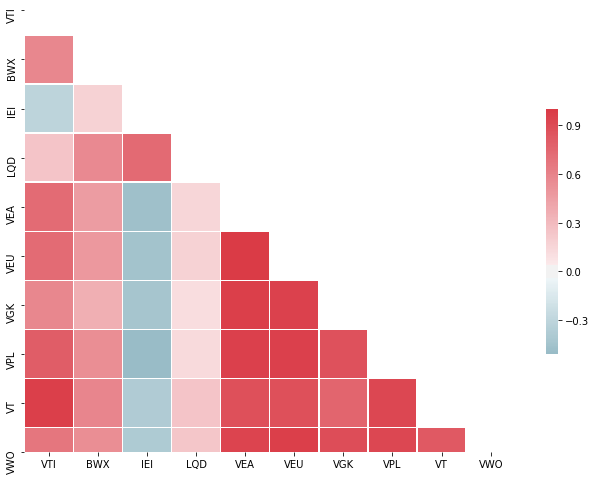

In [3]:
##Correlation Matrix Map##
corr_matrix=df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

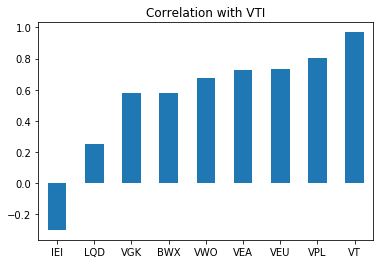

In [4]:
##Correlation Bar Plot##
pic=corr_matrix.iloc[0,1:].sort_values()
pic.plot.bar(rot=0, title='Correlation with VTI')